# Finance EDA – Step-by-Step
Dataset: Lending Club 50 k sample (consumer loans)<br>


## 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (9, 4)

## 2. Download dataset (only first time)

In [ ]:
# kaggle api must be configured on your machine OR use direct link
!pip -q install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/wordsforthewise/lending-club')  # 50 k rows sample

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saishritamohapatra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wordsforthewise/lending-club


100%|██████████| 1.26G/1.26G [00:18<00:00, 71.9MB/s]


## 3. Load the data

In [ ]:
raw = pd.read_csv('lending-club/accepted_2007_to_2018Q4.csv.gz', low_memory=False)
raw.shape

(2260701, 151)

## 4. Quick peek

In [ ]:
raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Clean column names (spaces, lower case)

In [ ]:
raw.columns = raw.columns.str.strip().str.lower().str.replace(' ', '_')
raw.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

## 6. Retain only the columns we need for the analysis

In [ ]:
keep = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_range_low',
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
 'term', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
df = raw[keep].copy()
df.shape

(2260701, 17)

## 7. Missing-value inspection

In [ ]:
miss = (df.isnull().sum().sort_values(ascending=False) / len(df) * 100).round(2)
miss[miss > 0]

,0
revol_util,0.08
dti,0.08


## 8. Drop rows with >1 % missing (for simplicity)

In [ ]:
df = df.dropna()
df.shape

(2257159, 17)

## 9. Clean data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257159 entries, 0 to 2260698
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   int_rate             float64
 2   installment          float64
 3   annual_inc           float64
 4   dti                  float64
 5   fico_range_low       float64
 6   open_acc             float64
 7   pub_rec              float64
 8   revol_bal            float64
 9   revol_util           float64
 10  total_acc            float64
 11  term                 int64  
 12  home_ownership       object 
 13  verification_status  object 
 14  loan_status          object 
 15  purpose              object 
 16  addr_state           object 
 17  bad_loan             int64  
dtypes: float64(11), int64(2), object(5)
memory usage: 327.2+ MB


## 10. Quick statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2257159.0,15045.827542,9186.896195,500.00,8000.00,12900.00,20000.00,4.000000e+04
int_rate,2257159.0,13.090818,4.831086,5.31,9.49,12.62,15.99,3.099000e+01
installment,2257159.0,445.777350,267.072937,4.93,251.68,377.99,593.14,1.719830e+03
annual_inc,2257159.0,78042.304646,112711.756118,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2257159.0,18.826448,14.155406,-1.00,11.90,17.84,24.49,9.990000e+02
fico_range_low,2257159.0,698.570854,32.999330,610.00,675.00,690.00,715.00,8.450000e+02
open_acc,2257159.0,11.619990,5.638720,1.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2257159.0,0.197700,0.570747,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2257159.0,16664.004322,22904.135688,0.00,5960.00,11332.00,20252.00,2.904836e+06
revol_util,2257159.0,50.338592,24.711428,0.00,31.50,50.30,69.40,8.923000e+02


## 11. Histogram of interest rates

In [ ]:
plt.hist(df['int_rate'], bins=40, edgecolor='k')
plt.title('Distribution – Interest Rate')
plt.xlabel('Int Rate %');

## 12. Boxplot – DTI by home ownership

Text(0.5, 1.0, 'Debt-to-Income by Home Ownership')

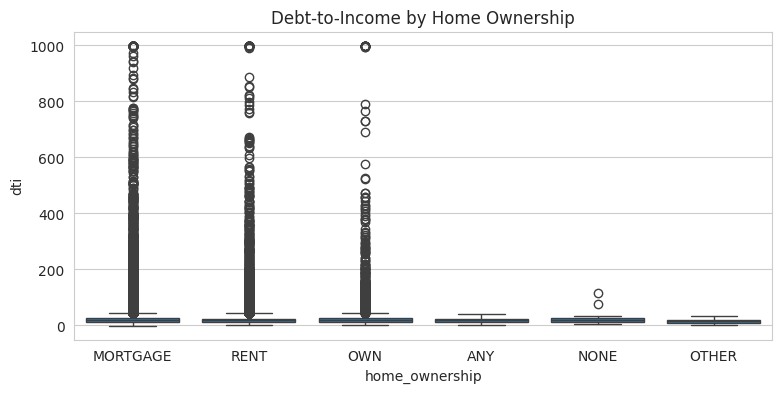

In [ ]:
sns.boxplot(x='home_ownership', y='dti', data=df)
plt.title('Debt-to-Income by Home Ownership')

## 13. Correlation heat-map (numeric only)

In [ ]:
num = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm');

## 14. Bad-loan rate by purpose

In [ ]:
bad_by_purpose = df.groupby('purpose')['bad_loan'].agg(['mean', 'count']).sort_values('mean', ascending=False)
bad_by_purpose

## 15. Average interest rate by FICO bucket

In [ ]:
df['fico_bucket'] = pd.cut(df['fico_range_low'], bins=[0, 650, 700, 750, 850],
                           labels=['<650', '650-700', '700-750', '>750'])
rate_fico = df.groupby('fico_bucket')['int_rate'].mean()
rate_fico

## 16. Save cleaned data for report notebook

In [31]:
df.to_csv('finance_clean.csv', index=False)
print("Saved → finance_clean.csv")

Saved → finance_clean.csv
